In [21]:
#1. Install Dependencies
!pip install ultralytics


Defaulting to user installation because normal site-packages is not writeable


In [22]:
2. Update traffic.yaml
import yaml
from pathlib import Path

# Replace this with your actual dataset root folder
dataset_root = r"C:\Users\ASUS\Downloads\Cairo-Car-v3-5\traffic_data"

traffic_yaml = {
    "train": str(Path(dataset_root) / "images" / "train"),
    "val": str(Path(dataset_root) / "images" / "val"),
    "nc": 21,
    "names": [
        "ambulance","auto rickshaw", "bicycle","bus", "car", "garbagevan",
        "human hauler", "minibus", "minivan", "motorbike", "Pickup", "army vehicle",
        "policecar", "rickshaw", "scooter", "suv", "taxi", "three wheelers (CNG)",
        "truck", "van", "wheelbarrow"
    ]
}

with open("traffic.yaml", "w") as f:
    yaml.dump(traffic_yaml, f, default_flow_style=False)

print("✅ traffic.yaml created at:", Path("traffic.yaml").absolute())


SyntaxError: invalid syntax (1823539825.py, line 1)

In [ ]:
# Import YOLO and load model
from ultralytics import YOLO

# Load YOLOv12 large pre-trained model
model = YOLO("yolo12l.pt")


In [ ]:
!pip install gdown


In [ ]:
# Download the Dataset:
import gdown

# Google Drive file ID
file_id = '1LR1VnpEg2jN75K_Vkd6zFq3P0mzvQY7p'
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Output path for the downloaded zip file
output = 'traffic_dataset.zip'

# Download the dataset
gdown.download(url, output, quiet=False)


In [ ]:
# Extract the ZIP File
import zipfile

# Path to the downloaded zip file
zip_file_path = 'traffic_dataset.zip'

# Directory to extract to
extract_dir = 'traffic_data'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Dataset extracted to {extract_dir}")


In [ ]:
# Verify the Dataset Structure
import os

# List the contents of the extracted directory
for root, dirs, files in os.walk(extract_dir):
    print(f"Found directory: {root}")
    for file in files:
        print(f"  {file}")


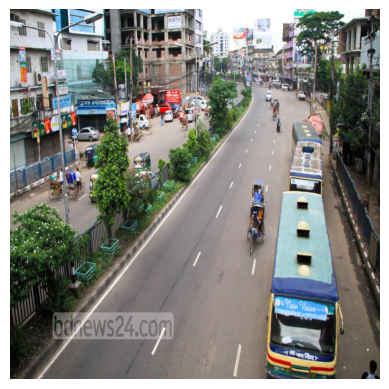

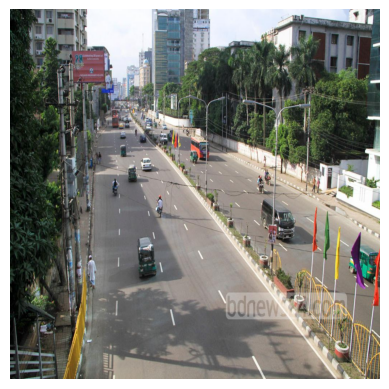

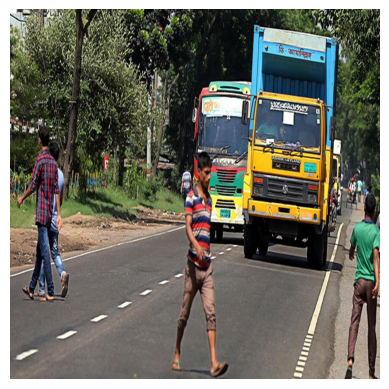

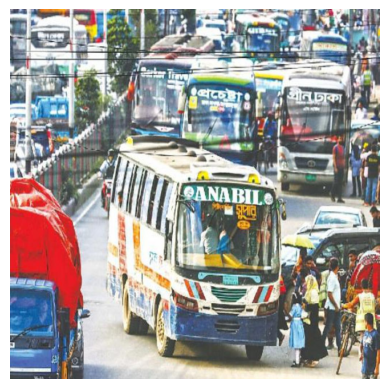

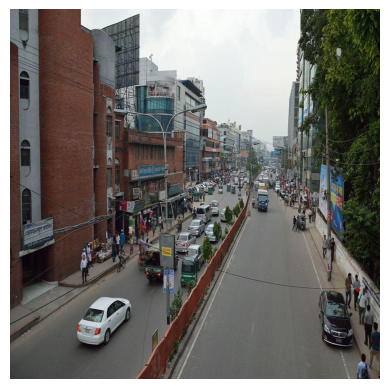

In [13]:
# Load and Display Sample Images
import matplotlib.pyplot as plt
import cv2
import glob

# Path to training images
train_images_path = os.path.join(extract_dir, 'images', 'train', '*.jpg')

# Get a list of image files
image_files = glob.glob(train_images_path)

# Display the first 5 images
for img_path in image_files[:5]:
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()


In [14]:
# Create traffic.yaml Configuration File
import yaml
from pathlib import Path

# Define dataset root
dataset_root = Path(extract_dir)

# Define class names
class_names = [
    "ambulance", "auto rickshaw", "bicycle", "bus", "car", "garbagevan",
    "human hauler", "minibus", "minivan", "motorbike", "Pickup", "army vehicle",
    "policecar", "rickshaw", "scooter", "suv", "taxi", "three wheelers (CNG)",
    "truck", "van", "wheelbarrow"
]

# Create the traffic.yaml content
traffic_yaml = {
    'train': str(dataset_root / 'images' / 'train'),
    'val': str(dataset_root / 'images' / 'val'),
    'nc': len(class_names),
    'names': class_names
}

# Path to save the yaml file
yaml_file_path = 'traffic.yaml'

# Write to traffic.yaml
with open(yaml_file_path, 'w') as yaml_file:
    yaml.dump(traffic_yaml, yaml_file, default_flow_style=False)

print(f"Configuration file saved to {yaml_file_path}")


Configuration file saved to traffic.yaml


In [16]:
# Train the Model
from ultralytics import YOLO

# Load YOLOv12 model
model = YOLO("yolo12l.pt")  # pre-trained YOLOv12 large model

# Train on your dataset
model.train(
    data="traffic.yaml",  # path to your traffic.yaml
    imgsz=640,            # input image size
    epochs=50,            # number of epochs
    batch=8,              # adjust based on your GPU
    name="dhaka_traffic_yolo12l"  # name for this training run
)


Ultralytics 8.3.189  Python-3.13.5 torch-2.8.0+cpu CPU (AMD Ryzen 7 5800HS with Radeon Graphics)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=traffic.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=dhaka_traffic_yolo12l4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

KeyboardInterrupt: 

Using image: traffic_data\images\train\01.jpg

image 1/1 C:\Users\ASUS\AppData\Roaming\Python\Python313\Scripts\traffic_data\images\train\01.jpg: 640x640 5 persons, 4 bicycles, 8 cars, 2 buss, 2 benchs, 1122.0ms
Speed: 12.7ms preprocess, 1122.0ms inference, 18.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict2


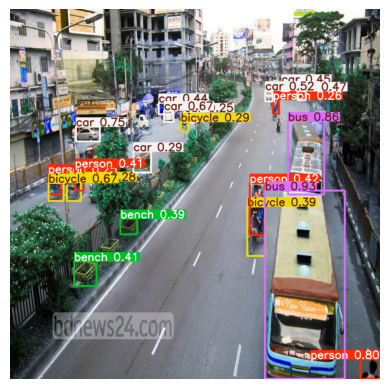

In [23]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import random

# Pick 1 image from the first 5 images you displayed
img_path = image_files[0]  # you can also use random.choice(image_files[:5]) to pick randomly
print("Using image:", img_path)

# Load pretrained YOLOv12 large model
model = YOLO("yolo12l.pt")

# Run detection on the selected image
results = model.predict(source=img_path, conf=0.25, save=True, imgsz=640)

# Display image with bounding boxes
plt.imshow(results[0].plot())
plt.axis("off")
plt.show()
